In [62]:
import pandas as pd
import seaborn as sb

# Change to your absolute path of the dataset
df = pd.read_csv('/Users/helenaf/Desktop/MASTER/IT3023/IT3023/data/dataset.csv')

df

,SID,GID,MOT,SCORE,MOT_CAT,SCORE_CAT,PUD,PUD_CAT,FREQ,DUR,TTAll,TTAC,TTAW,TTHard,TTEasy,TTMedium
0,mis-016815,1,1.00,0.88,1,1,1.00,1.0,10.0,909.27,1629.74,1226.790,402.95,745.790,286.53,597.42
1,mis-022158,0,0.44,0.38,0,2,NaN,NaN,NaN,NaN,1380.15,759.237,620.92,566.127,180.02,634.01
2,mis-022814,0,0.73,0.38,1,2,NaN,NaN,NaN,NaN,1214.13,356.139,857.99,404.840,342.50,466.80
3,mis-042515,1,0.72,0.25,1,3,0.62,1.0,8.0,194.14,1867.56,743.290,1124.27,856.780,710.97,299.81
4,mis-058915,1,0.32,0.13,0,3,0.16,0.0,6.0,287.71,1647.23,821.390,825.84,1243.250,177.56,226.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,mis-816254,0,0.33,0.25,0,3,NaN,NaN,NaN,NaN,1222.18,579.047,643.13,521.465,295.88,404.83
126,mis-816514,0,0.33,0.25,0,3,NaN,NaN,NaN,NaN,817.85,271.906,545.95,394.115,59.31,364.43
127,mis-829314,0,0.40,0.25,0,3,NaN,NaN,NaN,NaN,1026.12,440.612,585.51,266.060,427.57,332.50
128,mis-916023,0,0.33,0.13,0,3,NaN,NaN,NaN,NaN,1422.55,529.132,893.41,695.501,547.74,179.31


1. Group into experimental and control group. Group df_1 has dashboard, group df_2 does not. 

In [66]:
df_1 = df[df.GID != 0] #Dashboard
df_2 = df[df.GID != 1] #No dashboard
# ALso removing irrelevant columns from df_2
df_2.drop(['PUD', 'PUD_CAT', 'FREQ', 'DUR'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2. Comparing motivations for each group

In [22]:
print ('Mean group 1:', df_1.MOT.mean())
print ('Mean group 2:', df_2.MOT.mean())

Mean group 1: 0.5934848484848486
Mean group 2: 0.5284375


A little bit higher motivation for dashboard group. Could be something to bear in mind, but it shouldnt be so important? 

3. Comparing total score of each group

In [23]:
print ('Avg score group 1: ', df_1.SCORE.mean())
print ('Avg score group 2: ', df_2.SCORE.mean())

Avg score group 1:  0.5384848484848485
Avg score group 2:  0.42234375


Dashboard group got a higher score than the other group. 

4. Comparing results of high-motivated students and low-motivated students

In [53]:
# High motivation
df_1_high_mot = df_1[df_1.MOT_CAT == 0]
df_2_high_mot = df_2[df_2.MOT_CAT == 0]

# Low motivation
df_1_low_mot = df_1[df_1.MOT_CAT == 1]
df_2_low_mot = df_2[df_2.MOT_CAT == 1]


In [55]:
print('Time spent on all questions for high-motivated students: \n Group 1: ', df_1_high_mot.TTAll.mean(), ' and group 2: ', df_2_high_mot.TTAll.mean())
print('Time spent on all questions for low-motivated students: \n Group 1: ', df_1_low_mot.TTAll.mean(), ' and group 2: ', df_2_low_mot.TTAll.mean())


Time spent on all questions for high-motivated students: 
 Group 1:  1366.515  and group 2:  1233.0760975609758
Time spent on all questions for low-motivated students: 
 Group 1:  1445.232857142857  and group 2:  1297.95652173913



Both the high- and low-motivated students spent more time on the questions when dashboard was available, than the students without dashboard. 


5. Comparing correlation matrix of group 1 and 2

<AxesSubplot:>

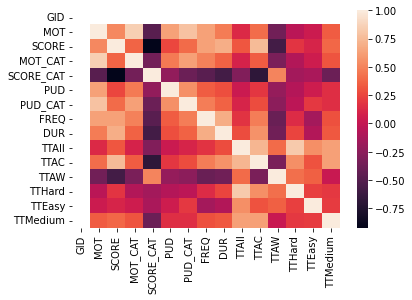

In [63]:
corr1 = df_1.corr()
sb.heatmap(corr1)


<AxesSubplot:>

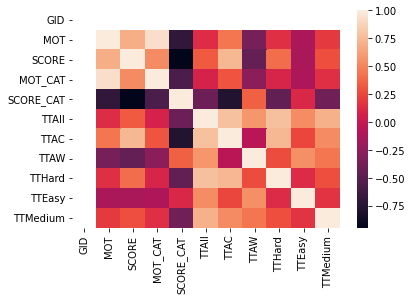

In [67]:
corr2 = df_2.corr()
sb.heatmap(corr2)

[[<AxesSubplot:title={'center':'SCORE'}>
  <AxesSubplot:title={'center':'TTAll'}>
  <AxesSubplot:title={'center':'TTAC'}>]
 [<AxesSubplot:title={'center':'TTAW'}>
  <AxesSubplot:title={'center':'TTHard'}>
  <AxesSubplot:title={'center':'TTEasy'}>]
 [<AxesSubplot:title={'center':'TTMedium'}> <AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'SCORE'}>
  <AxesSubplot:title={'center':'TTAll'}>
  <AxesSubplot:title={'center':'TTAC'}>]
 [<AxesSubplot:title={'center':'TTAW'}>
  <AxesSubplot:title={'center':'TTHard'}>
  <AxesSubplot:title={'center':'TTEasy'}>]
 [<AxesSubplot:title={'center':'TTMedium'}> <AxesSubplot:> <AxesSubplot:>]]


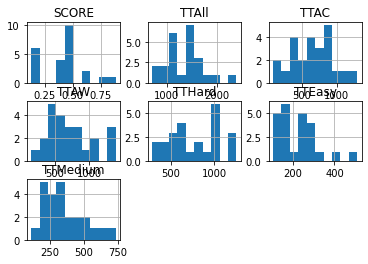

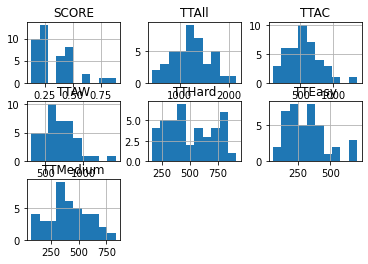

In [68]:
print (df_1_high_mot.hist(column=['SCORE', 'TTAll', 'TTAC','TTAW','TTHard','TTEasy','TTMedium']))
print (df_2_high_mot.hist(column=['SCORE', 'TTAll', 'TTAC','TTAW','TTHard','TTEasy','TTMedium']))

Comparing histograms between group 1 and 2 

[[<AxesSubplot:title={'center':'MOT'}>
  <AxesSubplot:title={'center':'SCORE'}>
  <AxesSubplot:title={'center':'TTAll'}>]
 [<AxesSubplot:title={'center':'TTAC'}>
  <AxesSubplot:title={'center':'TTAW'}>
  <AxesSubplot:title={'center':'TTHard'}>]
 [<AxesSubplot:title={'center':'TTEasy'}>
  <AxesSubplot:title={'center':'TTMedium'}> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'MOT'}>
  <AxesSubplot:title={'center':'SCORE'}>
  <AxesSubplot:title={'center':'TTAll'}>]
 [<AxesSubplot:title={'center':'TTAC'}>
  <AxesSubplot:title={'center':'TTAW'}>
  <AxesSubplot:title={'center':'TTHard'}>]
 [<AxesSubplot:title={'center':'TTEasy'}>
  <AxesSubplot:title={'center':'TTMedium'}> <AxesSubplot:>]]


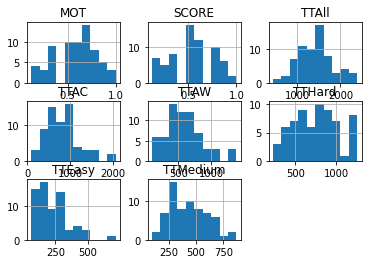

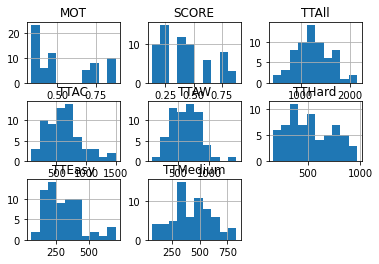

In [40]:
print (df_1.hist(column=['MOT', 'SCORE', 'TTAll', 'TTAC','TTAW','TTHard','TTEasy','TTMedium']))
print (df_2.hist(column=['MOT', 'SCORE', 'TTAll', 'TTAC','TTAW','TTHard','TTEasy','TTMedium']))

6. Perceived usefulness of dashboard

In [69]:
df_1.PUD.mean()

0.5298484848484848